In [1]:
"""This code creates a simple feedforward neural net and trains on the mnist dataset"""

'This code creates a simple feedforward neural net and trains on the mnist dataset'

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def array_to_onehot(array,max):
    """expects an array with values between 0 and max, and outputs an array of onehot encoding vectors"""
    onehot = np.zeros((len(array),max))
    onehot[np.arange(len(array)), array] = 1
    return onehot

class neural_net:
    """a simple feedforward NN"""
    def __init__(self):
        self.__nHiddenLayers__ = 0
        self.__has_input_layer__ = False
        self.__has_output_layer__ = False
    def add_input_layer(self,size):
        """size is the number of nodes in the input layer"""
        if self.__has_input_layer__ == True:
            raise AttributeError('neural net already has an input layer defined')
        else: 
            self.__has_input_layer__ = True
    def add_output_layer(self,size):
        """size is the number of nodes in the output layer"""
        if self.__has_output_layer__ == True:
            raise AttributeError('neural net already has an output layer defined')
        else: 
            self.__has_output_layer__ = True

In [4]:
"""loading the mnist dataset"""
data = pd.read_csv("train.csv")

In [5]:
data_array = np.array(data)

n_total_data = len(data_array)
#rand_order = np.arange(n_total_data)
#random.shuffle(rand_order)
np.random.shuffle(data_array)

perc_train = 0.7
train_data = data_array[:int(n_total_data*perc_train)]
test_data = data_array[int(n_total_data*perc_train):]

In [6]:
"""formatting the data into usable format and split into training and testing"""
data_array = np.array(data)

n_total_data = len(data_array)
perc_train = 0.7

train_data, test_data, _ = np.split(data_array,[int(n_total_data*perc_train),n_total_data],axis = 0)

"""creates three arrays y_train_onehot with onehot encoding vectors, y_train with 
the corresponding number, and x_train with corresponding 28x28 images flattened"""
y_train, x_train, _ = np.split(train_data,[1,len(train_data[0])],axis = 1)
y_train = y_train.reshape(len(y_train))
y_train_onehot = array_to_onehot(y_train,10)

"""creates three arrays y_test_onehot with onehot encoding vectors, y_test with 
the corresponding number, and x_test with corresponding 28x28 images flattened"""
y_test, x_test, _ = np.split(test_data,[1,len(test_data[0])],axis = 1)
y_test = y_test.reshape(len(y_test))
y_test_onehot = array_to_onehot(y_test,10)

/Users/James/anaconda/lib/python2.7/site-packages/numpy/lib/shape_base.py:430: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)


4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


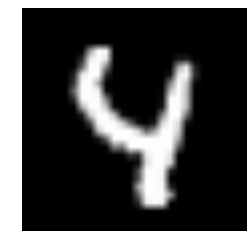

In [7]:
"""example of the data for one sample point"""
sample = 66

print(y_train[sample])
print(y_train_onehot[sample])
plt.imshow(x_train[sample].reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

In [8]:
n_hidden_nodes=50
n_output_nodes=10

W=np.random.rand(len(x_train[0]),n_hidden_nodes)-0.5
V=np.random.rand(n_output_nodes,n_hidden_nodes)-0.5